## Configuring IPython modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 100

In [3]:
import time, array, random, copy, math, os, seaborn, itertools, operator

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.special import comb

from IPython.display import HTML, display_html, display
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline
seaborn.set_context('paper', font_scale=1.1)
seaborn.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
pd.DataFrame._repr_latex_ = lambda self: ' \n\n\\bigskip\n'+self.to_latex() +'\\bigskip'

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['hatch.color'] = 'gray'
plt.rcParams['hatch.linewidth'] = 0.5

In [5]:
import playfair as play

In [6]:
paper_loc = 'oa/'

In [7]:
local_loc = 'journal/'

In [8]:
seaborn.set_context('paper', font_scale=1.1)

In [9]:
random.seed(np.pi)

In [10]:
#from deap import algorithms, base, benchmarks, tools, creator

In [11]:
#algo_names = ('A', 'B','C', 'D', 'e', 'f', 'g', 'h')

In [12]:
algo_names_full = ['NSGA-II', 'NSGA-III', 'SMS-EMOA', 'R2-EMOA', 'Euclidean']

In [13]:
problems = ['$M=3$',
            '$M=6$',
            '$M=9$', 
            '$M=12$', '$M=15$']

In [14]:
dimensions = [3, 6, 9, 12, 15]

In [15]:
problems_dict = {'m-3':  '$M=3$',
                 'm-6':  '$M=6$',
                 'm-9':  '$M=9$', 
                 'm-12': '$M=12$',
                 'm-15': '$M=15$'}

In [16]:
problems_revese = {'$M=3$': 'm-3',
                   '$M=6$': 'm-6',
                   '$M=9$': 'm-9', 
                   '$M=12$': 'm-12',
                   '$M=15$': 'm-15'}

In [17]:
[ i*6.28 for i in [1.57, 0.59, 0.57,  0.63, 0.57]]

[9.8596, 3.7052, 3.5795999999999997, 3.9564000000000004, 3.5795999999999997]

In [18]:
wfg1     = {'$M=3$': [ 0.01, 0.01, 0.01,  0.03, 0.01],
            '$M=6$': [ 0.15, 0.05, 0.035, 0.03, 0.02],
            '$M=9$': [ 0.58, 0.14, 0.1,   0.19, 0.091], 
            '$M=12$': [1.57, 0.59, 0.57,  0.63, 0.57],
            '$M=15$': [9.8596, 3.7052, 3.5795999999999997, 3.9564000000000004, 3.5795999999999997]}

In [19]:
wfg1_std = {'$M=3$': [0.015,  0.025, 0.056, 0.031, 0.034],
            '$M=6$': [0.022, 0.023, 0.026, 0.032, 0.043],
            '$M=9$': [0.078, 0.034, 0.056, 0.060, 0.061], 
            '$M=12$': [0.157, 0.159, 0.157, 0.193, 0.192],
             '$M=15$': [0.557, 0.559, 0.557, 0.593, 0.592]}

In [20]:
wfg2 = {problem: [x * (1 + 0.1*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg2_std = {problem: [x * (0.75 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [21]:
wfg3 = {problem: [x * (1 + 0.1*np.random.random()) for x in wfg2[problem]] for problem in wfg2}
wfg3_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg2_std[problem]] for problem in wfg2_std}

In [22]:
wfg4 = {problem: [x * (1 + 0.15*np.random.random()) for x in wfg3[problem]] for problem in wfg3}
wfg4_std = {problem: [x * (0.995 + 0.1*np.random.random()) for x in wfg3_std[problem]] for problem in wfg3_std}

In [23]:
wfg5 = {problem: [x * (1 + 0.11*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg5_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [24]:
wfg6 = {problem: [x * (1 + 0.11*np.random.random()) for x in wfg2[problem]] for problem in wfg2}
wfg6_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg2_std[problem]] for problem in wfg2_std}

In [25]:
wfg7 = {problem: [x * (1 + 0.14*np.random.random()) for x in wfg5[problem]] for problem in wfg5}
wfg7_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg5_std[problem]] for problem in wfg5_std}

In [26]:
wfg8 = {problem: [x * (1 + 0.16*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg8_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [27]:
wfg9 = {problem: [x * (1 + 0.15*np.random.random()) for x in wfg3[problem]] for problem in wfg3}
wfg9_std = {problem: [x * (0.85 + 0.1*np.random.random()) for x in wfg3_std[problem]] for problem in wfg3_std}

In [28]:
problems_tr = ('cluster-in-cluster', 'half-kernel', 'corners', 'crescent-full-moon', 'outliers', 'two-spirals')

In [29]:
size = '500'; target = 'True'

for i, algo in enumerate(algos_tr):
    for problem in problems_tr:
        data = pd.read_csv(os.getcwd() + os.sep + 'ResultsOthersAISs'+ os.sep +'50' + 
                           os.sep + algo + '-' + problem+'-'+size+'-'+target+'.csv')
        desc = data.describe()
        accuracy[problems_dict[problem]][8 + i] = desc[' Accuracy']['mean']
        accuracy_std[problems_dict[problem]][8 + i] = desc[' Accuracy']['std']
        recall[problems_dict[problem]][8 + i] = desc[' Recall']['mean']
        recall_std[problems_dict[problem]][8 + i] = desc[' Recall']['std']
        specificity[problems_dict[problem]][8 + i] = desc[' Specificity']['mean']
        specificity_std[problems_dict[problem]][8 + i] = desc[' Specificity']['std']

In [30]:
data = {'WFG1': wfg1, 'WFG2': wfg2, 'WFG3': wfg3, 
        'WFG4': wfg4, 'WFG5': wfg5, 'WFG6': wfg6, 
        'WFG7': wfg7, 'WFG8': wfg8, 'WFG9': wfg9}

In [31]:
data_std = {'WFG1': wfg1_std, 'WFG2': wfg2_std, 'WFG3': wfg3_std, 
            'WFG4': wfg4_std, 'WFG5': wfg5_std, 'WFG6': wfg6_std, 
            'WFG7': wfg7_std, 'WFG8': wfg8_std, 'WFG9': wfg9_std}

In [32]:
matraca = {}

In [33]:
def generate_problem_samples(means, stds, min_bound, max_bound):
    return pd.DataFrame(np.minimum(max_bound, np.maximum(min_bound, means + (np.random.normal(np.zeros(len(means)), 
                                                                stds, size=(30,len(means)))))))

In [34]:
def generate_results(metric, problem_name, min_bound, max_bound):
    means = data[metric][problem_name]
    stds = data_std[metric][problem_name]
    res = generate_problem_samples(means, stds, min_bound, max_bound)
    res.columns = algo_names_full
    return res

In [35]:
def load_results(metric, problem_name, min_bound=0, max_bound=np.inf):
    if not (metric, problem_name) in matraca.keys():
        matraca[(metric, problem_name)] = generate_results(metric, problem_name, min_bound, max_bound)
        
    return matraca[(metric, problem_name)]

In [36]:
matraca

{}

## Statistical description of the results

We here review the statistical features of the data.

In [37]:
def compute_stat_matrix(data, stat_func, alpha=0.05):
    '''A function that applies `stat_func` to all combinations of columns in `data`.
    Returns a squared matrix with the p-values.'''
    p_values = pd.DataFrame(columns=data.columns, index=data.columns)
    for a,b in itertools.combinations(data.columns,2):
        p = 0
        try:
            s,p = stat_func(data[a], data[b])
        except ValueError:
            # print('Columns', a,b,'identicals')
            pass
        p_values[a].loc[b] = p
        p_values[b].loc[a] = p
        
    alpha_sid = 1 - (1-alpha)**(1/comb(len(p_values.columns), 2)) # Sidak correction of alpha
    
    # a True value implies non-homogeneous results
    binary_outcome = p_values.applymap(lambda value: np.NAN if np.isnan(value) else value <= alpha)
    return p_values, binary_outcome

In [38]:
def test_summary(data, test_result, comparer=operator.le):
    'Assumes minimization problems.'
    summarized_result = pd.DataFrame(columns=data.columns, index=data.columns)
    means = data.mean()
    for a,b in itertools.combinations(data.columns,2):
        if test_result[a].loc[b]:
            if comparer(means[a], means[b]):
                summarized_result[a].loc[b] = '-'
                summarized_result[b].loc[a] = '+'
            else:
                summarized_result[a].loc[b] = '+'
                summarized_result[b].loc[a] = '-'
        else:
            summarized_result[a].loc[b] = '~'
            summarized_result[b].loc[a] = '~'
    for a in data.columns:
        summarized_result[a].loc[a] = 'x'
    return summarized_result

## Rendering the results for html viewing

Legend:
* A **+** sign in a green box means that the algorithm in the row has an statistically significant better performace than the algorithm on the column.
* A **-** sign in a red box means that the algorithm in the row has an statistically significant poorer performace than the algorithm on the column.
* A **~** sign in a blue box means that the algorithm in the row has produced that are not statistically significantly different than the algorithm on the column.
* A **x** sign in a gray box means that test is not applicable.

In [39]:
HTML('''<style>
        .win { text-align: center; background-color: LightGreen; }
        .lose { text-align: center; background-color: LightCoral; }
        .equ { text-align: center; background-color: LightBlue; }
        .null { text-align: center; background-color: LightGray; }
        </style>''')

In [40]:
def html_formatter(item):
    if item == '+':
        return '<div class="win">+</div>'
    elif item == '-':
        return '<div class="lose">-</div>'
    elif item == '~':
        return '<div class="equ">~</div>'
    return '<div class="null">x</div>'

In [41]:
def latex_formatter(item):
    if item == '+':
        return '\\pc'
    elif item == '-':
        return '\\nc'
    elif item == '~':
        return '\\ii'
    return '\\no'

In [42]:
def export_latex(summary, problem_name, num_vars):
    algo = summary.columns
    summary.columns = algi
    file_name = os.getcwd()+os.sep+'stats'+os.sep+problem+'--vars-'+str(num_var)+'.tex'
    summary.to_latex( file_name, formatters={col:latex_formatter for col in summary.columns}, 
                         escape=False, column_format='r' + 'c'*len(summary.columns))
    summary.columns = algo

Applying statistical test Mann-Whitney

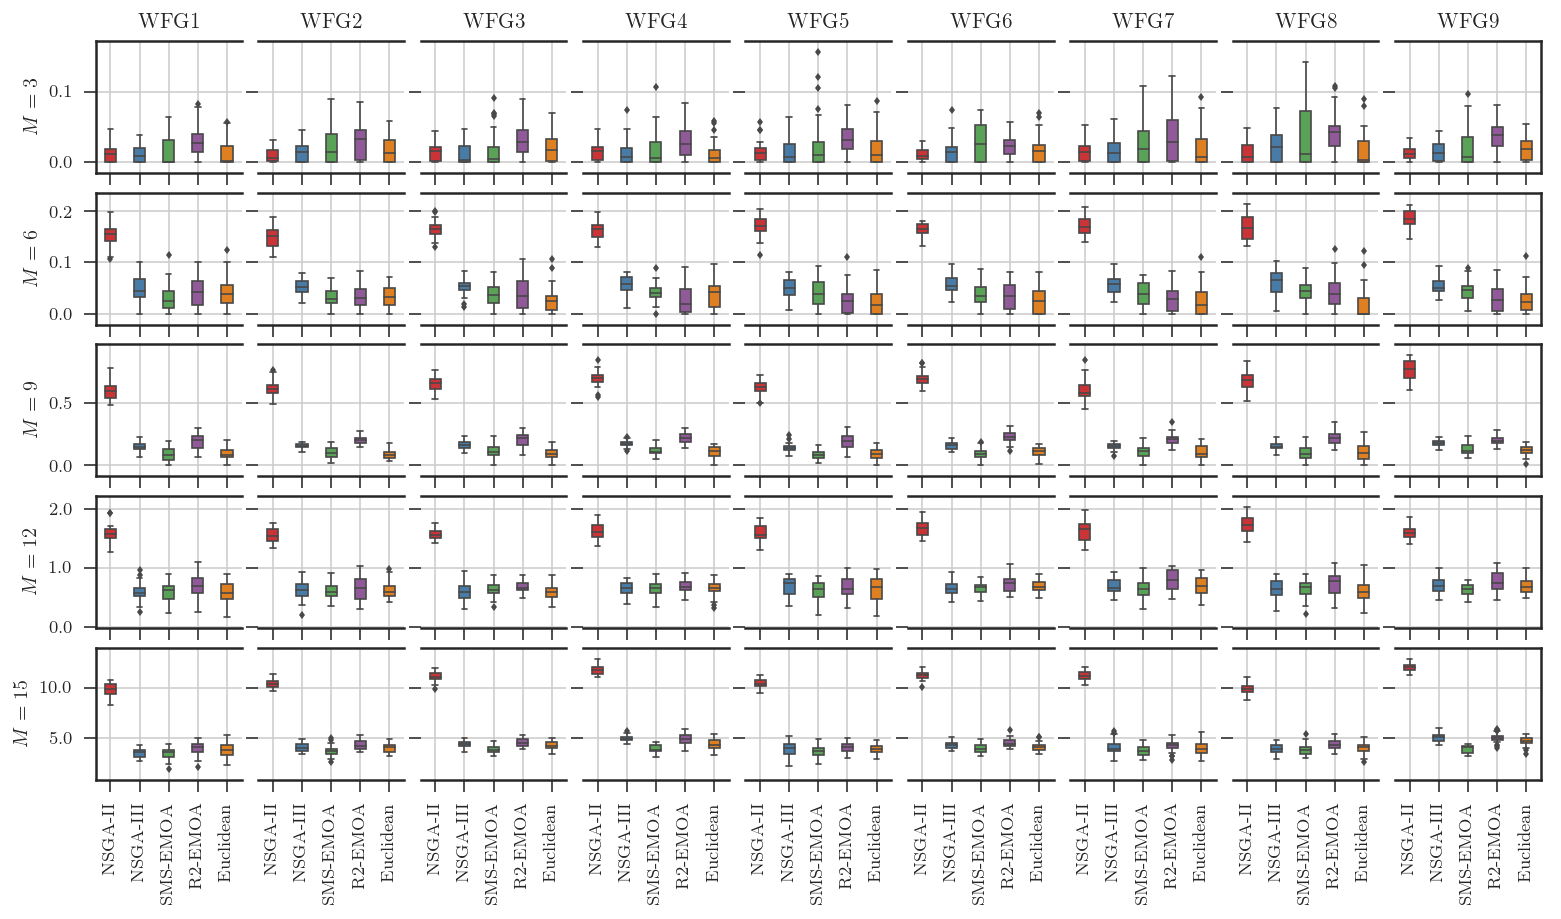

In [43]:
matraca={}
sharedxes = []
#plt.figure()

fig,axs = plt.subplots(len(problems), len(data), figsize=(11,6.5))


#plt.autoscale(enable=True, axis='y', tight=True)
for p, problem in enumerate(problems):
    mini, maxi = np.inf, -np.inf 
    for m, metric in enumerate(sorted(data)):
    
    #display(HTML('<h2>Number of obj: '+ str(num_obj) + '.</h2>'))
    
        #pal= seaborn.husl_palette(len(problem_instances))
        #display(HTML('<h3>Problem: '+ problem + '.</h3>'))
        
        if m == 0:
            ax = axs[p,m] # plt.subplot(len(problems),len(data), p*len(data) + m+1)
            ax.spines['right'].set_color('none')
            #ax.set_ylim(0,1)
            #ax.set_autoscale_on(True)

        else:
            ax = ax = axs[p,m] # plt.subplot(len(problems),len(data), p*len(data) + m+1, sharey=lead_ax)
            #ax.set_ylim(0,1)
            ax.spines['left'].set_color('none')
            #ax.set_autoscale_on(True)
            if not m == len(data)-1:
                ax.spines['right'].set_color('none')      
        
        #ax.autoscale(enable=True, axis='y', tight=True)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        #print(p,o)
        cosas = load_results(metric, problem)
        
        mini = min(mini, cosas.min(axis=0).min())
        maxi = max(maxi, cosas.max(axis=0).max())
        g = seaborn.boxplot(data=cosas, ax=ax, palette='Set1', saturation=0.74,
                            width=0.38, notch=False, linewidth=0.83, fliersize=3)
        
        # growing the y limits a little for better visualisation
        #bounds = g.get_ylim()
        #factor = (bounds[1] - bounds[0])*0.05
        #g.set_ylim([ bounds[0]-factor, bounds[1]+factor])
        
        if p==len(problems)-1:
            g.set_xticklabels(algo_names_full, rotation=90)
        else:
            g.set_xticklabels([])
        
        if m==0:
            g.set_ylabel(problem)
        else:
            ax.set_yticklabels([])
        #if p > 0:
        #    plt.setp(g.get_yticklabels(), visible=False)
        
        if p==0:
            ax.set_title(metric)
        
        _, outcome = compute_stat_matrix(cosas, stats.mannwhitneyu)
        summary = test_summary(cosas, outcome)
        
        #if m == 0:
        #    summary.to_latex('stats/problems-test--' + problems_revese[problem] + '--'+ metric + '.tex', 
        #                     formatters={col:latex_formatter for col in summary.columns},
        #                     escape=False, column_format='r' + 'c'*len(summary.columns))
        #else:
        #    summary.to_latex('stats/problems-test--' + problems_revese[problem] + '--'+ metric + '.tex',
        #                     formatters={col:latex_formatter for col in summary.columns},
        #                     escape=False, column_format='r' + 'c'*len(summary.columns),
        #                     index=False)
        #plt.tight_layout()
        #plt.savefig('boxplot--' + problem + '--objs-'+num_obj[3]+'.pdf')
        #plt.show()
        #display(HTML(summary.to_html(formatters={col:html_formatter for col in summary.columns}, escape=False)))
        ax.grid(axis='both')
    spread = (maxi-mini)*0.1
    for m, metric in enumerate(sorted(data)):
        axs[p,m].set_ylim(mini -spread,maxi+spread)
    
plt.tight_layout()

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.074   # the amount of width reserved for blank space between subplots
hspace = 0.074   # the amount of height reserved for white space between subplots
plt.subplots_adjust(hspace=2*hspace, wspace=1.55*wspace)

#plt.autoscale(enable=True, axis='y', tight=True)

# plt.savefig('figs/boxplots-hyp.pgf', bbox_inches='tight')
# plt.tight_layout()
plt.show()

In [44]:
file_preffix = 'hypervolume'

In [45]:
seaborn.set_context('paper', font_scale=1.35)

In [46]:
stat_func = stats.mannwhitneyu
alpha = 0.05

In [47]:
import xarray as xr

In [48]:
res = np.stack( np.stack((matraca[(problem, dim)] for dim in problems)) for problem in data)

In [49]:
res.shape

(9, 5, 30, 5)

In [50]:
da = xr.DataArray(res, dims=('Problem', 'Dimension', 'Run', 'Algorithm'),
                  coords={'Problem': list(data.keys()), 'Dimension': dimensions, 'Algorithm':algo_names_full})

In [51]:
from matplotlib.ticker import StrMethodFormatter

In [52]:
dim_formatter = '$M={0}$'
y_formatter = StrMethodFormatter('{x:3.2g}')

In [53]:
subplot_adjust = {#'left'   : 0.125,  # the left side of the subplots of the figure
                  #'right'  : 0.9,    # the right side of the subplots of the figure
                  #'bottom' : 0.1,    # the bottom of the subplots of the figure
                  #'top'    : 0.9,    # the top of the subplots of the figure
                  'wspace': 0.11,   # the amount of width reserved for blank space between subplots
                  'hspace': 0.092}

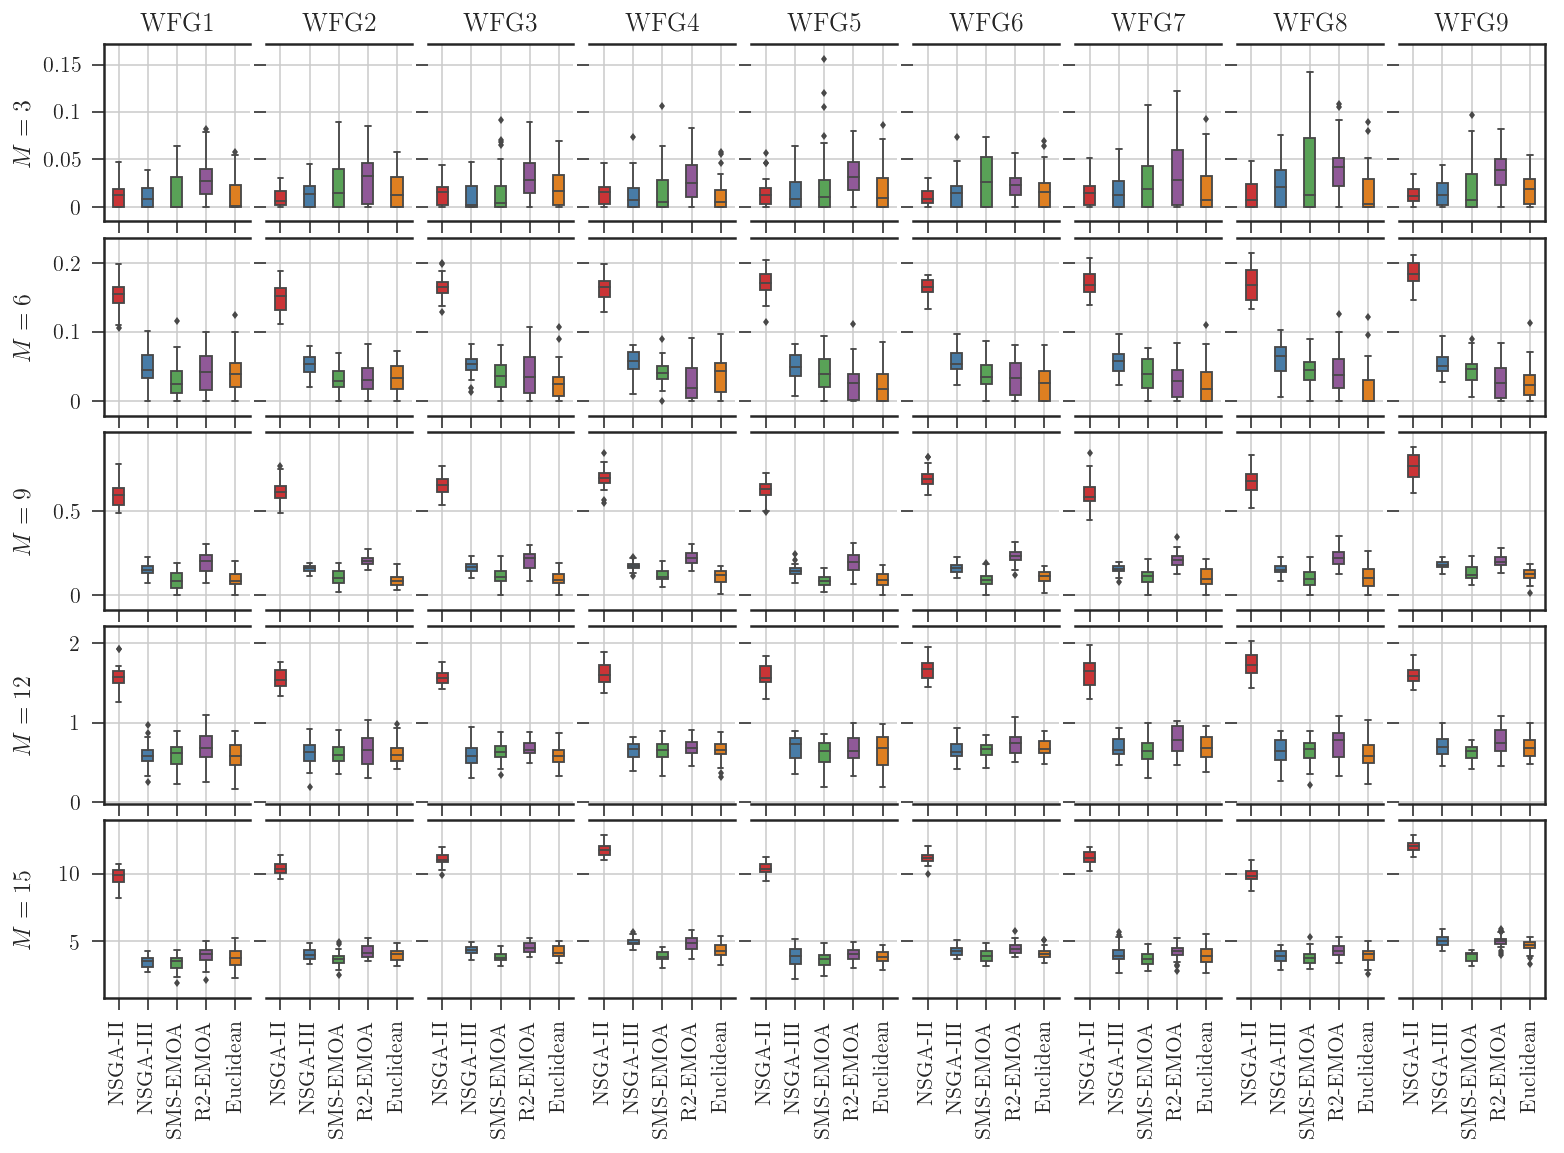

In [54]:
fig = play.plot_assemble_boxplot(da, 'Dimension', 'Problem', 'Algorithm',
                                 # col_title_formatter=col_formatter,
                                 row_title_formatter=dim_formatter,
                                 y_axis_formatter=y_formatter,
                                 figsize=(11, 1.64*len(dimensions)),
                                 y_label_offset=-0.47,
                                 subplot_adjust=subplot_adjust,
                                 sharey=True)

In [55]:
stats_folder = os.getcwd()+ os.sep+ 'stats' + os.sep
figs_folder = os.getcwd() + os.sep+ 'figs' + os.sep

In [56]:
if not os.path.exists(stats_folder):
    os.mkdir(stats_folder)
if not os.path.exists(figs_folder):
    os.mkdir(figs_folder)

In [57]:
fig.savefig(figs_folder+file_preffix + '--boxplots.pgf', bbox_inches='tight')

/Users/lm/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_pgf.py:54: UserWarning: error getting fonts from fc-list
  warnings.warn('error getting fonts from fc-list', UserWarning)


In [58]:
for metric in da['Dimension']:
    mini_brick = da.sel(**{'Dimension':metric})
    latex_str = play.stat_tests_latex(mini_brick, 'Problem', 'Dimension', 'Algorithm', 
                                      show_p_values=True, 
                                      rotate_col_names=False,
                                      comparator=operator.gt)
    file = open(stats_folder+file_preffix+'-stats-pvalues--'+ str(metric.values) +'.tex', 'w') 
    file.write(latex_str)
    file.close()

In [59]:
latex_str = play.stat_tests_latex(da, 'Problem', 'Dimension', 'Algorithm', 
                                      show_p_values=False, 
                                      rotate_col_names=True,
                                      comparator=operator.lt, 
                                  col_title_formatter='$M={0}$')
file = open(stats_folder+file_preffix+'-stats-pvalues.tex', 'w') 
file.write(latex_str)
file.close()

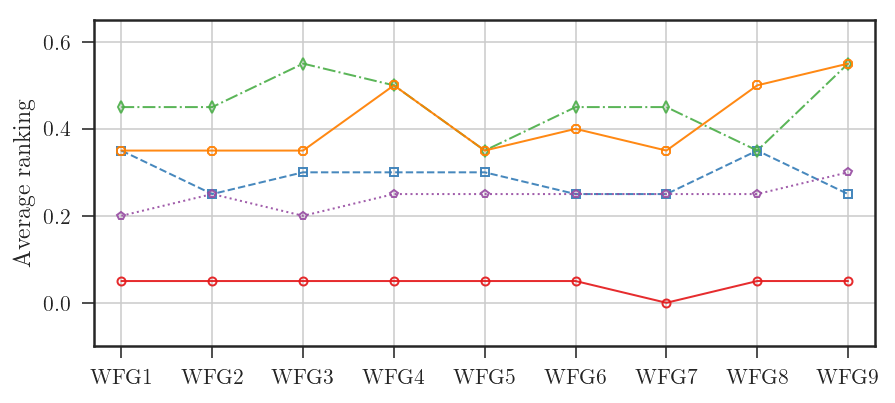

In [60]:
summarized = play.compute_ranking(da, 'Problem', 'Dimension', 'Algorithm', comparator=operator.gt)
fig = play.ranking_plot(summarized, figsize=(7, 3), show_legend=False)
plt.savefig(figs_folder+file_preffix + '--summary-by-problem.pgf', bbox_inches='tight')

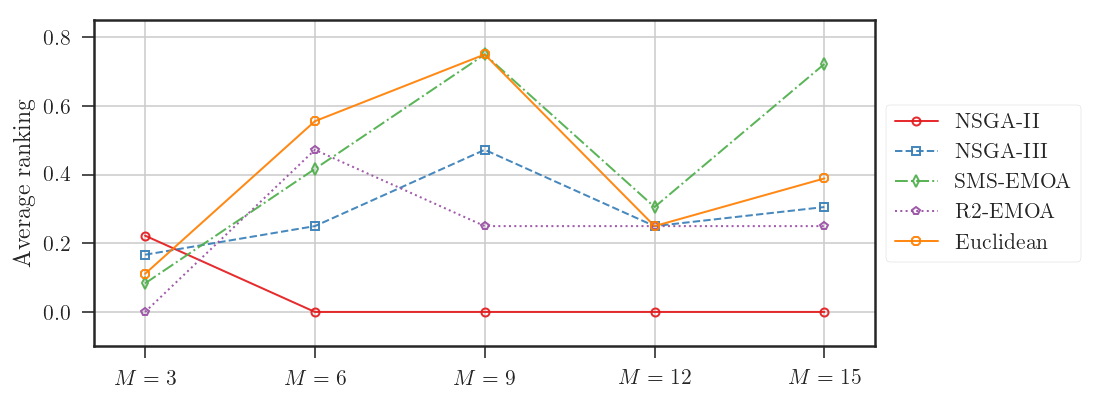

In [61]:
summarized = play.compute_ranking(da, 'Dimension', 'Problem', 'Algorithm', comparator=operator.gt)
fig = play.ranking_plot(summarized, figsize=(7, 3), xtick_labels=('$M={}$'.format(i) for i in dimensions))
plt.savefig(figs_folder+file_preffix + '--summary-by-dimension.pgf', bbox_inches='tight')

In [62]:
da0 = da

# DCI

In [63]:
seaborn.set_context('paper', font_scale=1.1)

In [64]:
wfg1     = {'$M=3$': [0.59, 0.7995, 0.794, 0.793, 0.796],
            '$M=6$': [0.001, 0.63, 0.57, 0.596, 0.708],
            '$M=9$': [0.0015, 0.64, 0.41, 0.46, 0.69], 
            '$M=12$': [0.0010, 0.66, 0.43, 0.43, 0.750],
            '$M=15$': [0.0010, 0.65, 0.47, 0.47, 0.740]}

In [65]:
wfg1_std = {'$M=3$': [0.015,  0.025, 0.056, 0.041, 0.044],
            '$M=6$': [0.0032, 0.033, 0.036, 0.042, 0.043],
            '$M=9$': [0.0058, 0.054, 0.056, 0.090, 0.091], 
            '$M=12$': [0.0257, 0.0159, 0.0157, 0.0193, 0.0192],
            '$M=15$': [0.0257, 0.0159, 0.0157, 0.0193, 0.0192]}

In [66]:
wfg2 = {problem: [x * (1 + 0.1*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg2_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [67]:
wfg3 = {problem: [x * (1 + 0.1*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg3_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [68]:
wfg4 = {problem: [x * (1 + 0.15*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg4_std = {problem: [x * (0.995 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [69]:
wfg5 = {problem: [x * (1 + 0.11*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg5_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [70]:
wfg6 = {problem: [x * (1 + 0.11*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg6_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [71]:
wfg7 = {problem: [x * (1 + 0.14*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg7_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [72]:
wfg8 = {problem: [x * (1 + 0.16*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg8_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [73]:
wfg9 = {problem: [x * (1 + 0.15*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg9_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [74]:
data = {'WFG1': wfg1, 'WFG2': wfg2, 'WFG3': wfg3, 
        'WFG4': wfg4, 'WFG5': wfg5, 'WFG6': wfg6, 
        'WFG7': wfg7, 'WFG8': wfg8, 'WFG9': wfg9}
data_std = {'WFG1': wfg1_std, 'WFG2': wfg2_std, 'WFG3': wfg3_std, 
            'WFG4': wfg4_std, 'WFG5': wfg5_std, 'WFG6': wfg6_std, 
            'WFG7': wfg7_std, 'WFG8': wfg8_std, 'WFG9': wfg9_std}

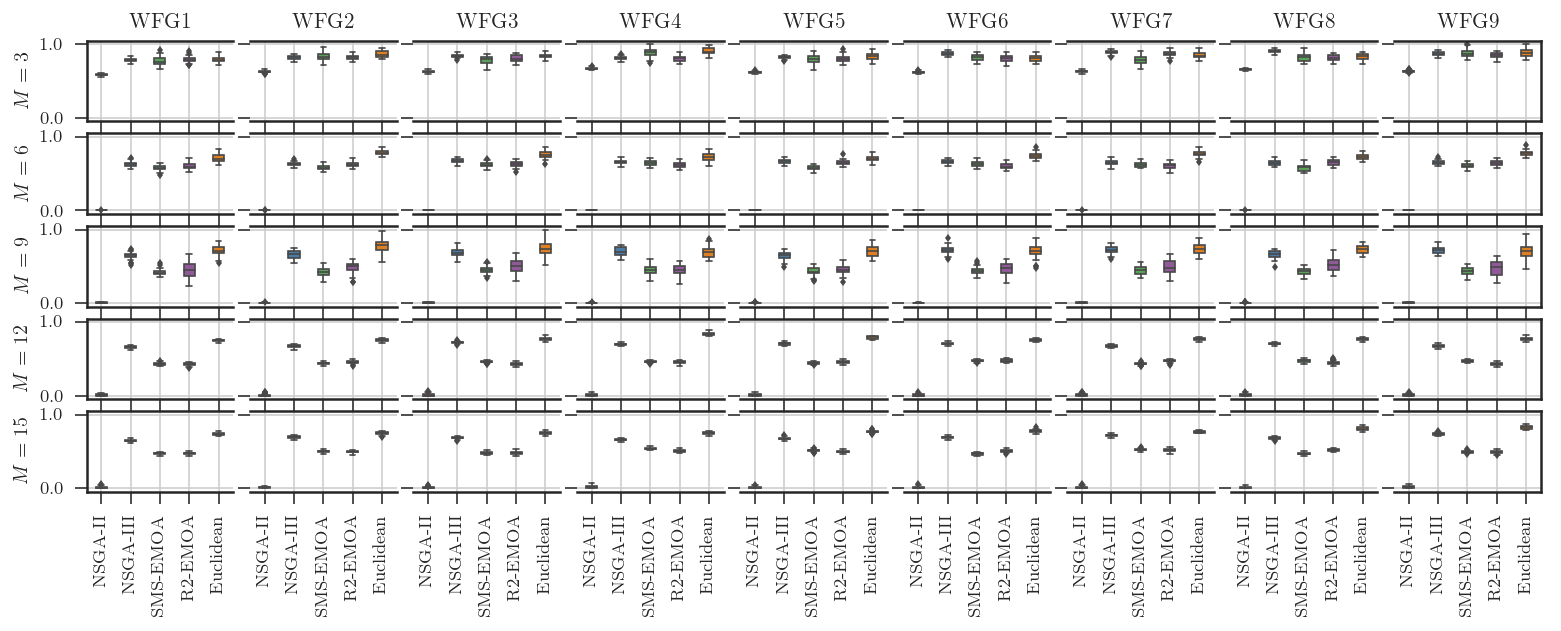

In [75]:
matraca={}
sharedxes = []
#plt.figure()

fig,axs = plt.subplots(len(problems), len(data), figsize=(11,4.5))

min_bound, max_bound = 0, 1
#plt.autoscale(enable=True, axis='y', tight=True)
for p, problem in enumerate(problems):
    mini, maxi = np.inf, -np.inf 
    for m, metric in enumerate(sorted(data)):
    
    #display(HTML('<h2>Number of obj: '+ str(num_obj) + '.</h2>'))
    
        #pal= seaborn.husl_palette(len(problem_instances))
        #display(HTML('<h3>Problem: '+ problem + '.</h3>'))
        
        if m == 0:
            ax = axs[p,m] # plt.subplot(len(problems),len(data), p*len(data) + m+1)
            ax.spines['right'].set_color('none')
            #ax.set_ylim(0,1)
            #ax.set_autoscale_on(True)

        else:
            ax = ax = axs[p,m] # plt.subplot(len(problems),len(data), p*len(data) + m+1, sharey=lead_ax)
            #ax.set_ylim(0,1)
            ax.spines['left'].set_color('none')
            #ax.set_autoscale_on(True)
            if not m == len(data)-1:
                ax.spines['right'].set_color('none')      
        
        #ax.autoscale(enable=True, axis='y', tight=True)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        #print(p,o)
        cosas = load_results(metric, problem, min_bound, max_bound)
        
        mini = min(mini, cosas.min(axis=0).min())
        maxi = max(maxi, cosas.max(axis=0).max())
        g = seaborn.boxplot(data=cosas, ax=ax, palette='Set1', saturation=0.74,
                            width=0.38, notch=False, linewidth=0.83, fliersize=3)
        
        # growing the y limits a little for better visualisation
        #bounds = g.get_ylim()
        #factor = (bounds[1] - bounds[0])*0.05
        #g.set_ylim([ bounds[0]-factor, bounds[1]+factor])
        
        if p==len(problems)-1:
            g.set_xticklabels(algo_names_full, rotation=90)
        else:
            g.set_xticklabels([])
        
        if m==0:
            g.set_ylabel(problem)
        else:
            ax.set_yticklabels([])
        #if p > 0:
        #    plt.setp(g.get_yticklabels(), visible=False)
        
        if p==0:
            ax.set_title(metric)
        
        #_, outcome = compute_stat_matrix(cosas, stats.mannwhitneyu)
        #summary = test_summary(cosas, outcome)
        
        #if m == 0:
        #    summary.to_latex('stats/problems-test--' + problems_revese[problem] + '--'+ metric + '.tex', 
        #                     formatters={col:latex_formatter for col in summary.columns},
        #                     escape=False, column_format='r' + 'c'*len(summary.columns))
        #else:
        #    summary.to_latex('stats/problems-test--' + problems_revese[problem] + '--'+ metric + '.tex',
        #                     formatters={col:latex_formatter for col in summary.columns},
        #                     escape=False, column_format='r' + 'c'*len(summary.columns),
        #                     index=False)
        #plt.tight_layout()
        #plt.savefig('boxplot--' + problem + '--objs-'+num_obj[3]+'.pdf')
        #plt.show()
        #display(HTML(summary.to_html(formatters={col:html_formatter for col in summary.columns}, escape=False)))
        ax.grid(axis='both',which='both')
    spread = (maxi-mini)*0.1
    for m, metric in enumerate(sorted(data)):
        axs[p,m].set_ylim(-0.05,1.05)
    
plt.tight_layout()

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.074   # the amount of width reserved for blank space between subplots
hspace = 0.074   # the amount of height reserved for white space between subplots
plt.subplots_adjust(hspace=2*hspace, wspace=1.55*wspace)

#plt.autoscale(enable=True, axis='y', tight=True)

#plt.savefig('figs/boxplots-dci.pgf', bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [76]:
seaborn.set_context('paper', font_scale=1.35)

In [77]:
stat_func = stats.mannwhitneyu
alpha = 0.05

In [78]:
import xarray as xr

In [79]:
res = np.stack( np.stack((matraca[(problem, dim)] for dim in problems)) for problem in data)

In [80]:
res.shape

(9, 5, 30, 5)

In [81]:
da = xr.DataArray(res, dims=('Problem', 'Dimension', 'Run', 'Algorithm'),
                  coords={'Problem': list(data.keys()), 'Dimension': dimensions, 'Algorithm':algo_names_full})

In [82]:
from matplotlib.ticker import StrMethodFormatter

In [83]:
dim_formatter = '$M={0}$'
y_formatter = StrMethodFormatter('{x:3.2g}')

In [84]:
subplot_adjust = {#'left'   : 0.125,  # the left side of the subplots of the figure
                  #'right'  : 0.9,    # the right side of the subplots of the figure
                  #'bottom' : 0.1,    # the bottom of the subplots of the figure
                  #'top'    : 0.9,    # the top of the subplots of the figure
                  'wspace': 0.11,   # the amount of width reserved for blank space between subplots
                  'hspace': 0.092}

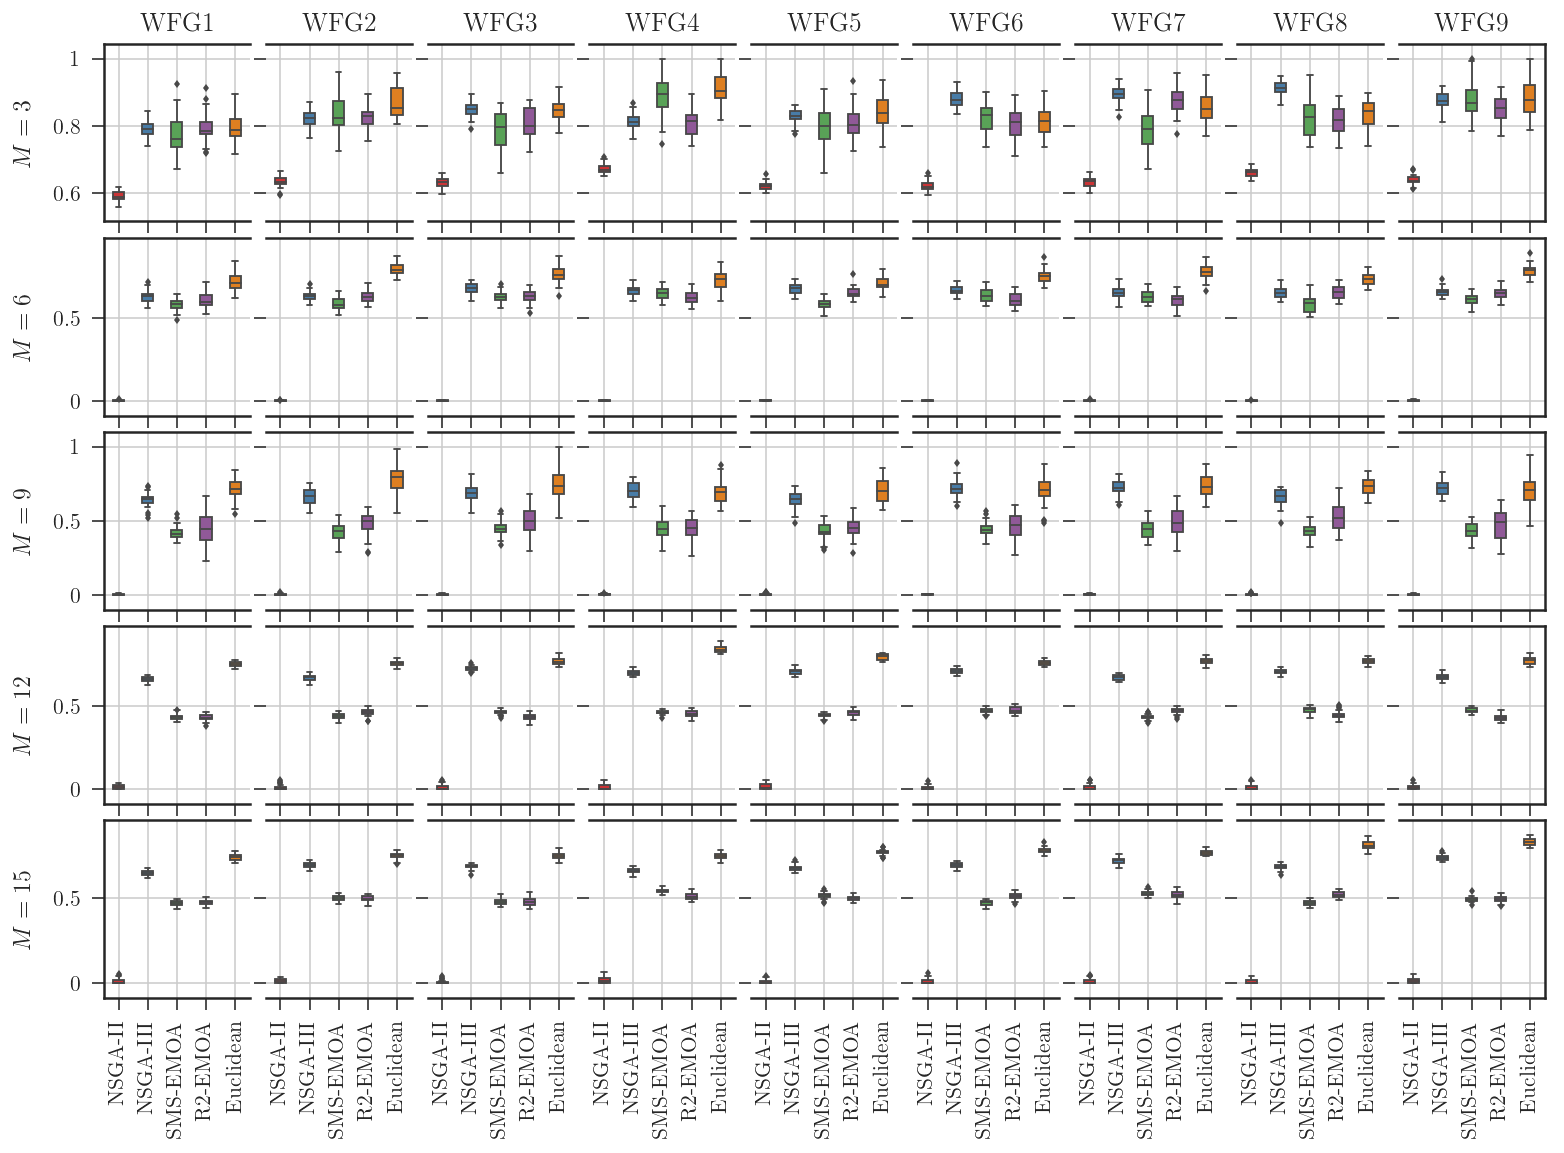

In [85]:
fig = play.plot_assemble_boxplot(da, 'Dimension', 'Problem', 'Algorithm',
                                 # col_title_formatter=col_formatter,
                                 row_title_formatter=dim_formatter,
                                 y_axis_formatter=y_formatter,
                                 figsize=(11, 1.64*len(dimensions)),
                                 y_label_offset=-0.47,
                                 subplot_adjust=subplot_adjust,
                                 sharey=True)

In [86]:
file_preffix='dci'

In [87]:
fig.savefig(figs_folder+file_preffix + '--boxplots.pgf', bbox_inches='tight')

In [88]:
for metric in da['Dimension']:
    mini_brick = da.sel(**{'Dimension':metric})
    latex_str = play.stat_tests_latex(mini_brick, 'Problem', 'Dimension', 'Algorithm', 
                                      show_p_values=True, 
                                      rotate_col_names=False,
                                      comparator=operator.lt)
    file = open(stats_folder+file_preffix+'-stats-pvalues--'+ str(metric.values) +'.tex', 'w') 
    file.write(latex_str)
    file.close()

In [89]:
latex_str = play.stat_tests_latex(da, 'Problem', 'Dimension', 'Algorithm', 
                                      show_p_values=False, 
                                      rotate_col_names=True,
                                      comparator=operator.lt, col_title_formatter='$M={0}$')
file = open(stats_folder+file_preffix+'-stats-pvalues.tex', 'w') 
file.write(latex_str)
file.close()

In [90]:
summarized = play.compute_ranking(da, 'Problem', 'Dimension', 'Algorithm', comparator=operator.lt)

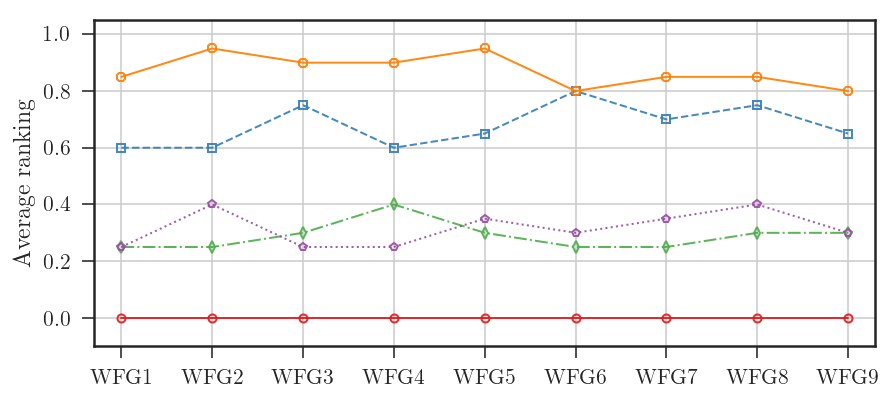

In [91]:
fig = play.ranking_plot(summarized, figsize=(7, 3), show_legend=False)
fig.savefig(figs_folder+file_preffix + '--summary-by-problem.pgf', bbox_inches='tight')

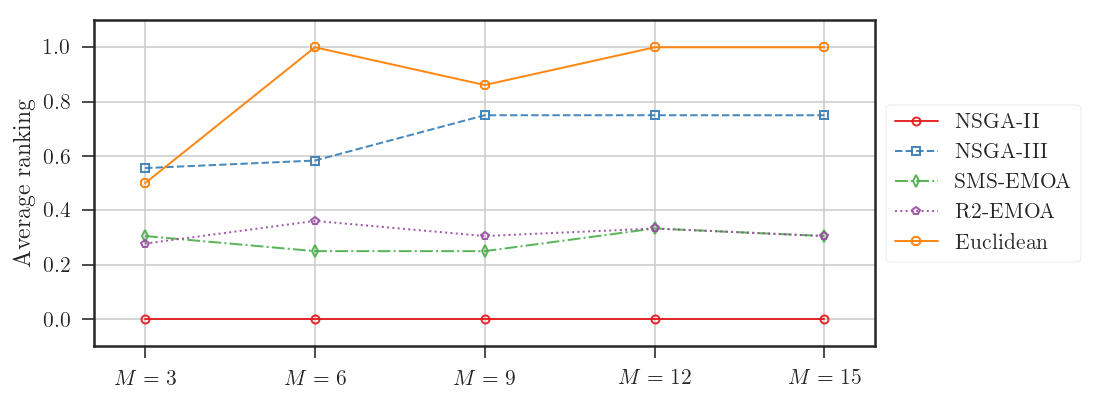

In [92]:
summarized = play.compute_ranking(da, 'Dimension', 'Problem', 'Algorithm', comparator=operator.lt)
fig = play.ranking_plot(summarized, figsize=(7, 3), xtick_labels=('$M={}$'.format(i) for i in dimensions))
fig.savefig(figs_folder+file_preffix + '--summary-by-dimension.pgf', bbox_inches='tight')

In [93]:
da1 = da

# Diversity

In [94]:
seaborn.set_context('paper', font_scale=1.1)

In [95]:
wfg1     = {'$M=3$':  [0.859,   0.8595, 0.8594, 0.8953, 0.896],
            '$M=6$':  [0.021,  0.63,   0.57,  0.596, 0.708],
            '$M=9$':  [0.0035, 0.64,   0.61,  0.56,  0.729], 
            '$M=12$': [0.0030, 0.66,   0.43,  0.43,  0.750],
            '$M=15$': [0.0038, 0.65,   0.47,  0.47,  0.740]}

In [96]:
wfg1_std = {'$M=3$': [0.0515,  0.025, 0.056, 0.041, 0.044],
            '$M=6$': [0.0332, 0.033, 0.036, 0.042, 0.043],
            '$M=9$': [0.020558, 0.054, 0.056, 0.090, 0.091], 
            '$M=12$': [0.05257, 0.05159, 0.03157, 0.07193, 0.04192],
            '$M=15$': [0.05257, 0.05159, 0.03157, 0.07193, 0.04192]}

In [97]:
wfg2 = {problem: [x * (1 + 0.1*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg2_std = {problem: [x * (0.75 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [98]:
wfg3 = {problem: [x * (1 + 0.1*np.random.random()) for x in wfg2[problem]] for problem in wfg2}
wfg3_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg2_std[problem]] for problem in wfg2_std}

In [99]:
wfg4 = {problem: [x * (1 + 0.15*np.random.random()) for x in wfg3[problem]] for problem in wfg3}
wfg4_std = {problem: [x * (0.995 + 0.1*np.random.random()) for x in wfg3_std[problem]] for problem in wfg3_std}

In [100]:
wfg5 = {problem: [x * (1 + 0.11*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg5_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [101]:
wfg6 = {problem: [x * (1 + 0.11*np.random.random()) for x in wfg2[problem]] for problem in wfg2}
wfg6_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg2_std[problem]] for problem in wfg2_std}

In [102]:
wfg7 = {problem: [x * (1 + 0.14*np.random.random()) for x in wfg5[problem]] for problem in wfg5}
wfg7_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg5_std[problem]] for problem in wfg5_std}

In [103]:
wfg8 = {problem: [x * (1 + 0.16*np.random.random()) for x in wfg1[problem]] for problem in wfg1}
wfg8_std = {problem: [x * (0.95 + 0.1*np.random.random()) for x in wfg1_std[problem]] for problem in wfg1_std}

In [104]:
wfg9 = {problem: [x * (1 + 0.15*np.random.random()) for x in wfg3[problem]] for problem in wfg3}
wfg9_std = {problem: [x * (0.85 + 0.1*np.random.random()) for x in wfg3_std[problem]] for problem in wfg3_std}

In [105]:
data = {'WFG1': wfg1, 'WFG2': wfg2, 'WFG3': wfg3, 
        'WFG4': wfg4, 'WFG5': wfg5, 'WFG6': wfg6, 
        'WFG7': wfg7, 'WFG8': wfg8, 'WFG9': wfg9}
data_std = {'WFG1': wfg1_std, 'WFG2': wfg2_std, 'WFG3': wfg3_std, 
            'WFG4': wfg4_std, 'WFG5': wfg5_std, 'WFG6': wfg6_std, 
            'WFG7': wfg7_std, 'WFG8': wfg8_std, 'WFG9': wfg9_std}

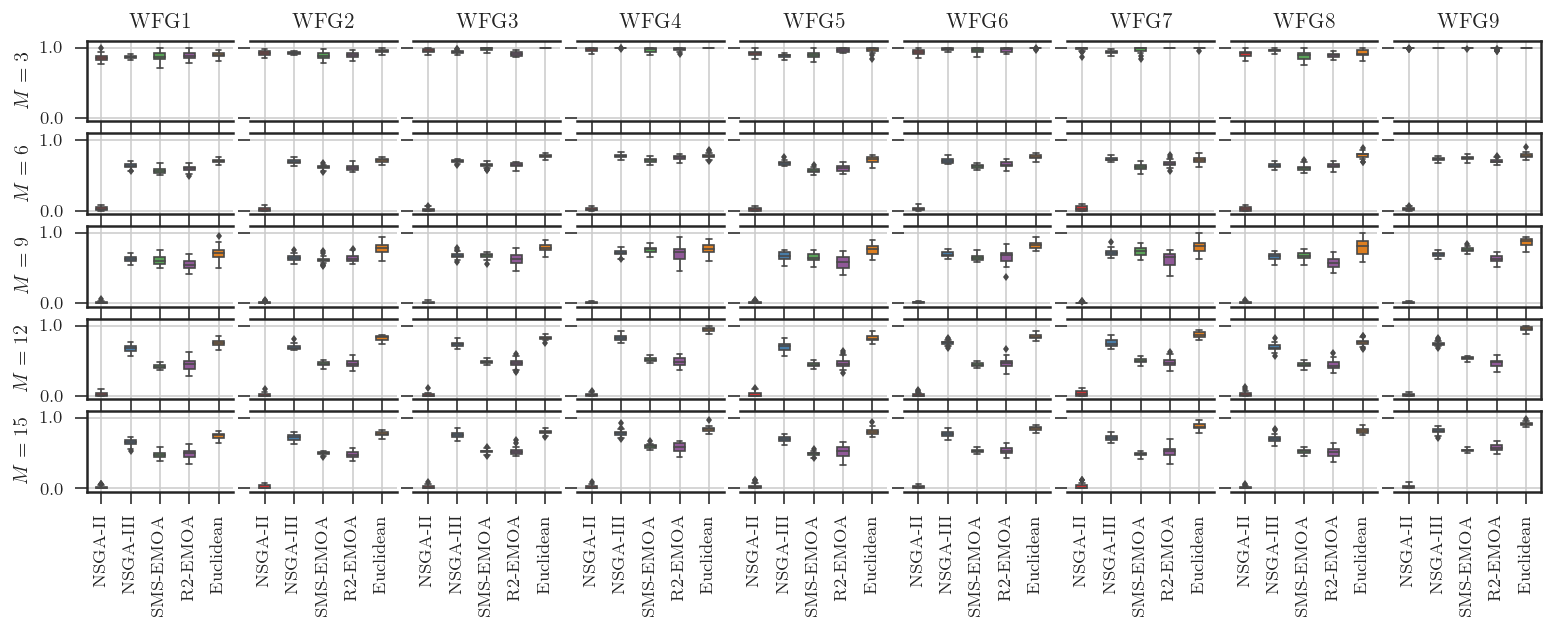

In [106]:
matraca={}
sharedxes = []
#plt.figure()

fig,axs = plt.subplots(len(problems), len(data), figsize=(11,4.5))

min_bound, max_bound = 0, 1
#plt.autoscale(enable=True, axis='y', tight=True)
for p, problem in enumerate(problems):
    mini, maxi = np.inf, -np.inf 
    for m, metric in enumerate(sorted(data)):
    
    #display(HTML('<h2>Number of obj: '+ str(num_obj) + '.</h2>'))
    
        #pal= seaborn.husl_palette(len(problem_instances))
        #display(HTML('<h3>Problem: '+ problem + '.</h3>'))
        
        if m == 0:
            ax = axs[p,m] # plt.subplot(len(problems),len(data), p*len(data) + m+1)
            ax.spines['right'].set_color('none')
            #ax.set_ylim(0,1)
            #ax.set_autoscale_on(True)

        else:
            ax = ax = axs[p,m] # plt.subplot(len(problems),len(data), p*len(data) + m+1, sharey=lead_ax)
            #ax.set_ylim(0,1)
            ax.spines['left'].set_color('none')
            #ax.set_autoscale_on(True)
            if not m == len(data)-1:
                ax.spines['right'].set_color('none')      
        
        #ax.autoscale(enable=True, axis='y', tight=True)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        #print(p,o)
        cosas = load_results(metric, problem, min_bound, max_bound)
        
        mini = min(mini, cosas.min(axis=0).min())
        maxi = max(maxi, cosas.max(axis=0).max())
        g = seaborn.boxplot(data=cosas, ax=ax, palette='Set1', saturation=0.74,
                            width=0.38, notch=False, linewidth=0.83, fliersize=3)
        
        # growing the y limits a little for better visualisation
        #bounds = g.get_ylim()
        #factor = (bounds[1] - bounds[0])*0.05
        #g.set_ylim([ bounds[0]-factor, bounds[1]+factor])
        
        if p==len(problems)-1:
            g.set_xticklabels(algo_names_full, rotation=90)
        else:
            g.set_xticklabels([])
        
        if m==0:
            g.set_ylabel(problem)
        else:
            ax.set_yticklabels([])
        #if p > 0:
        #    plt.setp(g.get_yticklabels(), visible=False)
        
        if p==0:
            ax.set_title(metric)
        
        #_, outcome = compute_stat_matrix(cosas, stats.mannwhitneyu)
        #summary = test_summary(cosas, outcome)
        
        #if m == 0:
        #    summary.to_latex('stats/problems-test--' + problems_revese[problem] + '--'+ metric + '.tex', 
        #                     formatters={col:latex_formatter for col in summary.columns},
        #                     escape=False, column_format='r' + 'c'*len(summary.columns))
        #else:
        #    summary.to_latex('stats/problems-test--' + problems_revese[problem] + '--'+ metric + '.tex',
        #                     formatters={col:latex_formatter for col in summary.columns},
        #                     escape=False, column_format='r' + 'c'*len(summary.columns),
        #                     index=False)
        #plt.tight_layout()
        #plt.savefig('boxplot--' + problem + '--objs-'+num_obj[3]+'.pdf')
        #plt.show()
        #display(HTML(summary.to_html(formatters={col:html_formatter for col in summary.columns}, escape=False)))
        ax.grid(axis='both',which='both')
    spread = (maxi-mini)*0.1
    for m, metric in enumerate(sorted(data)):
        axs[p,m].set_ylim(-0.05,1.1)
    
plt.tight_layout()

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.074   # the amount of width reserved for blank space between subplots
hspace = 0.074   # the amount of height reserved for white space between subplots
plt.subplots_adjust(hspace=2*hspace, wspace=1.55*wspace)

#plt.autoscale(enable=True, axis='y', tight=True)

#plt.savefig('figs/boxplots-div.pgf', bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [107]:
seaborn.set_context('paper', font_scale=1.35)

In [108]:
stat_func = stats.mannwhitneyu
alpha = 0.05

In [109]:
import xarray as xr

In [110]:
res = np.stack( np.stack((matraca[(problem, dim)] for dim in problems)) for problem in data)

In [111]:
res.shape

(9, 5, 30, 5)

In [112]:
da = xr.DataArray(res, dims=('Problem', 'Dimension', 'Run', 'Algorithm'),
                  coords={'Problem': list(data.keys()), 'Dimension': dimensions, 'Algorithm':algo_names_full})

In [113]:
from matplotlib.ticker import StrMethodFormatter

In [114]:
dim_formatter = '$M={0}$'
y_formatter = StrMethodFormatter('{x:3.2g}')

In [115]:
subplot_adjust = {#'left'   : 0.125,  # the left side of the subplots of the figure
                  #'right'  : 0.9,    # the right side of the subplots of the figure
                  #'bottom' : 0.1,    # the bottom of the subplots of the figure
                  #'top'    : 0.9,    # the top of the subplots of the figure
                  'wspace': 0.11,   # the amount of width reserved for blank space between subplots
                  'hspace': 0.092}

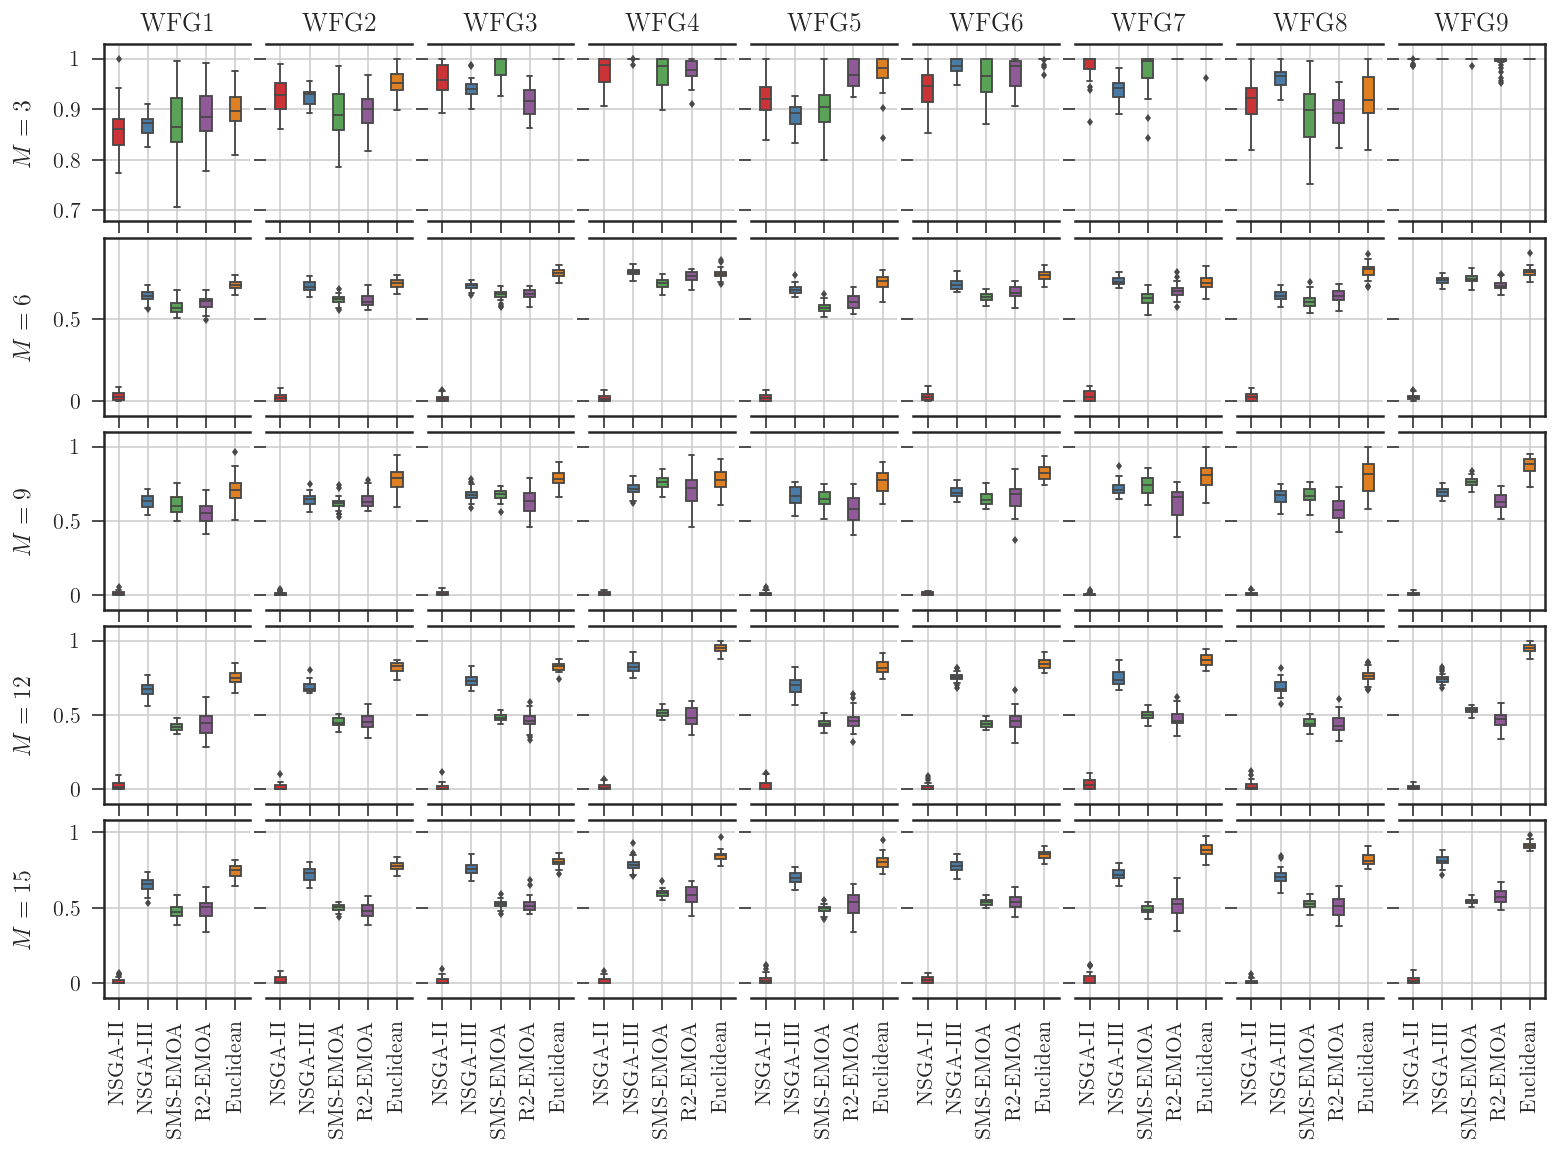

In [116]:
fig = play.plot_assemble_boxplot(da, 'Dimension', 'Problem', 'Algorithm',
                                 # col_title_formatter=col_formatter,
                                 row_title_formatter=dim_formatter,
                                 y_axis_formatter=y_formatter,
                                 figsize=(11, 1.64*len(dimensions)),
                                 y_label_offset=-0.47,
                                 subplot_adjust=subplot_adjust,
                                 sharey=True)

In [117]:
file_preffix ='diversity'

In [118]:
fig.savefig(figs_folder+file_preffix + '--boxplots.pgf', bbox_inches='tight')

In [119]:
for metric in da['Dimension']:
    mini_brick = da.sel(**{'Dimension':metric})
    latex_str = play.stat_tests_latex(mini_brick, 'Problem', 'Dimension', 'Algorithm', 
                                      show_p_values=True, 
                                      rotate_col_names=False,
                                      comparator=operator.lt, col_title_formatter='$M={0}$')
    file = open(stats_folder+ file_preffix+'-stats-pvalues--'+ str(metric.values) +'.tex', 'w') 
    file.write(latex_str)
    file.close()

In [120]:
latex_str = play.stat_tests_latex(da, 'Problem', 'Dimension', 'Algorithm', 
                                      show_p_values=False, 
                                      comparator=operator.lt,col_title_formatter='$M={0}$')
file = open(stats_folder+file_preffix+'-stats-pvalues.tex', 'w') 
file.write(latex_str)
file.close()

In [121]:
summarized = play.compute_ranking(da, 'Problem', 'Dimension', 'Algorithm', comparator=operator.lt)

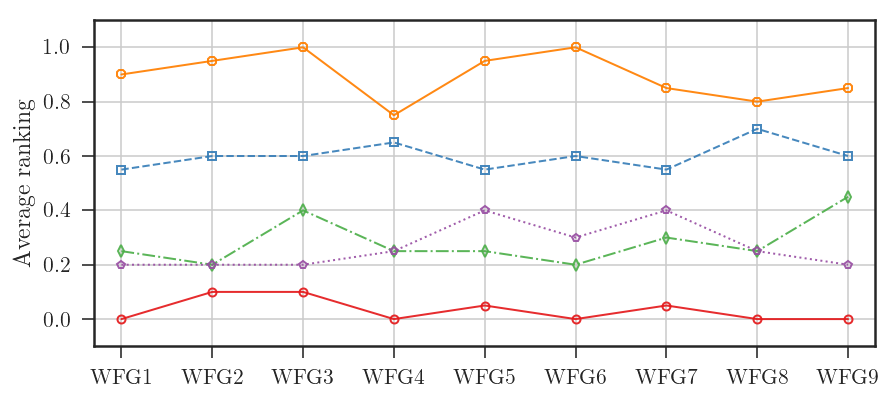

In [122]:
fig = play.ranking_plot(summarized, figsize=(7, 3), show_legend=False)
fig.savefig(figs_folder+file_preffix + '--summary-by-problem.pgf', bbox_inches='tight')

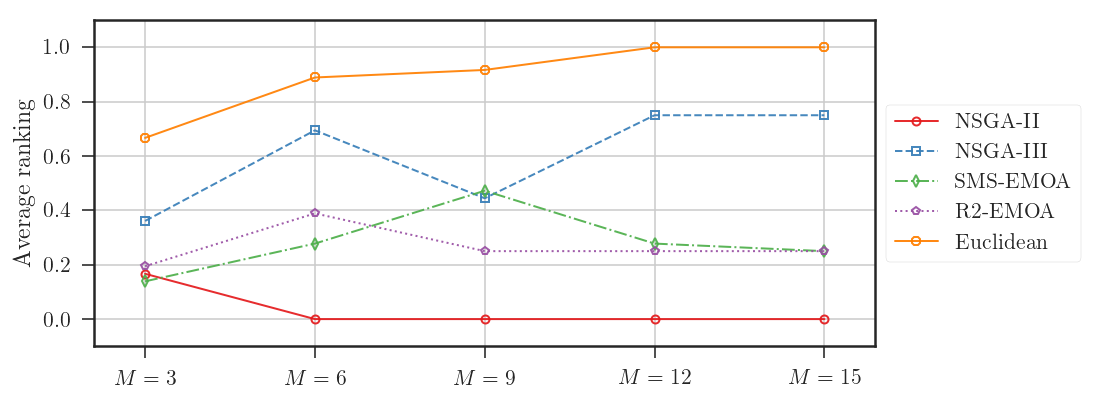

In [123]:
summarized = play.compute_ranking(da, 'Dimension', 'Problem', 'Algorithm', comparator=operator.lt)
fig = play.ranking_plot(summarized, figsize=(7, 3), xtick_labels=('$M={}$'.format(i) for i in dimensions))
fig.savefig(figs_folder+file_preffix + '--summary-by-dimension.pgf', bbox_inches='tight')

In [124]:
da2 = da